In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np
import math
# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics # analisa a acurácia de nossos modelos
# Ocultando Warnings indesejados



from sklearn.datasets import load_breast_cancer #importando a base de dados nativas no sklearn

dados=load_breast_cancer() # Carregando base de dados

# vamos ver a descrição de nossa base de dados
#print(dados.DESCR)

cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names) # convertendo para dataframe com ajuda do Pandas

cancer['Class']=dados.target # Adicionando a nossa Target
!wget https://raw.githubusercontent.com/sandeco/CanalSandeco/master/Deep%20Learning%20s%C3%A9rie/%2306%20-%20GD%20M%C3%BAltiplas%20Vari%C3%A1veis/prices.csv
df = pd.read_csv('prices.csv', on_bad_lines='skip')

--2022-05-11 16:27:41--  https://raw.githubusercontent.com/sandeco/CanalSandeco/master/Deep%20Learning%20s%C3%A9rie/%2306%20-%20GD%20M%C3%BAltiplas%20Vari%C3%A1veis/prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676 [text/plain]
Saving to: ‘prices.csv’

prices.csv          100%[===================>]     676  --.-KB/s    in 0s      

2022-05-11 16:27:41 (37.0 MB/s) - ‘prices.csv’ saved [676/676]



In [ ]:
from sklearn.model_selection import train_test_split

# primeiro vamos dividir nossa base de dados entre features e target
X= cancer.iloc[:,0:-1]# Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y=cancer.iloc[:,-1] # Selecionando todas as linhas da última coluna ['Class'].


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

### Funções auxiliares


Reta = Hipotese = $$ w_0 + w_1*X $$

###Sigmoide
Sigmoide = $$ \frac{1}{1+e^{-x}} $$


In [ ]:
def sigmoide(x):
  return 1/(1+math.exp(-x))

### Regressão Linear

###Erro Medio Quadrático  MSE

MSE(Erro Médio Quadrático) = $$ \frac{1}{m}∑_{i=0}^m (y'_i - y_i)^2 $$

sendo y' = $ w_0 + w_1*X $


###Gradiente descendente 1 variavel


Repita n vezes{
  $$ w_0 := w_0 - αΔ_{w_0} $$
  $$ w_1 := w_1 - αΔ_{w_1} $$
}

###Gradiente Descendente

Sendo $ α $, taxa de aprendizado \\
Sendo $Δ_{w_i} $, gradiente(derivada)

$$ Δ_{w_0} = \frac{δJ}{δw_0} J(w_0, w_1) $$

$$ Δ_{w_1} = \frac{δJ}{δw_0} J(w_0, w_1) $$

Sendo MSE = $ J(w_0, w_1) $


para $Δ_{w_0}$
\
$$ Δ_{w_0} = \frac{dJ}{dw_0} \frac{1}{2m} ∑_{i=0}^m (y' - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m ( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{1}{2m} ∑_{i=0}^m \frac{dJ}{dw_0}( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{1}{m} ∑_{i=0}^m ( (w_0 + w_1X) - y)$$
\
\
$$ Δ_{w_0} = \frac{1}{m} ∑_{i=0}^m ( y' - y)$$
\
\
\
\
para $Δ_{w_1}$
\
$$ Δ_{w_1} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m (y' - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m ( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{1}{2m} ∑_{i=0}^m \frac{dJ}{dw_1}( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{1}{2m} ∑_{i=0}^m 2( (w_0 + w_1*X_i) - y) (X_i) $$
\
\
$$ Δ_{w_1} = \frac{1}{m} ∑_{i=0}^m (y' - y) (X_i) $$

###Gradiente Descendente Atualizado
Repetir n vezes{
  $$w_0 := w_0 - α \frac{1}{m} ∑_{i=0}^m (y'_i-y_i) $$
\
  $$w_1 := w_1 - α \frac{1}{m} ∑_{i=0}^m x_i(y'_i - y_i) $$

}


###Custo:

$$ \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i)$$


###Algoritmo

#### Hyperparametros:
lr = Learning Rate = $α$ \
epochs = Numero de iterações = $n$ \

#### Entradas
x = features \
y = ground truth \
\
inicia-se os pesos $w_0, w_1$, exemplo \
$$w_0 = 0.1 $$ \
$$w_1 = 0.1 $$\
\
e seta os hiperparametros, exemplo \
$$lr = 0.1  $$ \\
$$epochs = 10 $$

para cada iteração até o numero de epocas: 
  calcular os erros w0, w1 e o custo: \

  $$ y' = w_0 + w_1*X $$ \\

  $$ erro_{w0} =  \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i) $$ \\

   $$ erro_{w1} =  \frac{1}{m} ∑_{i=0}^m x_i( y'_i - y_i) $$ \\

   $$ custo = \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i)$$

calcule os novos pesos: \

$$ w_0 = w_0 - erro_{w0} $$ \\
$$ w_1 = w_1 - erro_{w1} $$

retorna $w_0,\ w_1$, custo



In [ ]:
## Função de custo

#Mean Square Error - Erro Médio Quadrático
def MSE(predict, ground_truth):
  m = predict.size
  erro = sum((predict-ground_truth)**2)
  return erro/(2*m)

def cost(x, y, w0, w1):
  predict = np.asarray([y_hat(x[i], w0, w1) for i in range(len(x))])
  return 2*MSE(predict, y)


## valores preditos
def y_hat(x, w0, w1):
  return w0 + w1*x


## plotar linha
def plot_line(x, y, w0, w1):
  x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
  y_values = [y_hat(x, w0, w1) for x in x_values]
  plt.plot(x_values, y_values)
  plt.plot(x, y, 'bo')


##passo do gradiente descendente
##x = vetor de features
##y = ground_truth


def gradientDescStep(x, y, w0, w1, lr):
  erro_w0 = 0
  erro_w1 = 0
  m = len(x)

  for i in range(m):
    erro_w0 += y_hat(y[i], w0, w1)-y[i]
    erro_w1 += y_hat(y[i], w0, w1)-y[i]*x[i]
    
  w0_n = w0-(lr/m)*erro_w0
  w1_n = w1-(lr/m)*erro_w1
  return w0_n, w1_n


##algoritmo de gradiente descendente
def gradientDesc(x, y, w0, w1, lr, epochs):
  custo = []
  for i in range(epochs):
    w0, w1 = gradientDescStep(x, y, w0, w1, lr)
    custo.append(cost(x, y, w0, w1))
    #print("epoch: ", i)
    #print("custo: ", custo[i])

  return w0, w1, custo


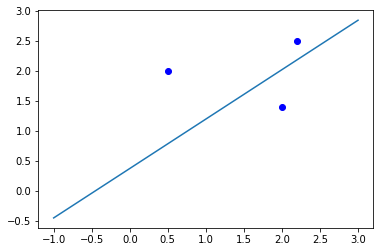

In [ ]:
### Teste funções

lr = 0.01
epochs = 40

w0 = 0.1
w1 = 0.1

x = [0.5, 2.2, 2.0]
y = [2.0, 2.5, 1.4]

w0, w1, custo =gradientDesc(x, y,w0, w1, lr, epochs)

plot_line(x, y, w0, w1 )

### Multiplas Variaveis

$$ y' = w_0X_0+ w_1X_1 + w_2X_2 + ... +w_nX_n$$

sendo $X_0 = 1$

#### Isso pode ser escrito na forma de 2 vetores

$$ X_{features} = \begin{bmatrix}
X_0 \\
X_1 \\
X_2 \\
. \\
. \\
. \\
X_n \\
\end{bmatrix} 
\
w_{pesos} = \begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
. \\
. \\
. \\
w_n \\
\end{bmatrix}
$$

####Gradiente com Multiplas variaveis

$$w_0 := w_0 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_0^i$$

$$w_1 := w_1 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_1^i$$

$$w_2 := w_2 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_2^i$$

$$w_n := w_n - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_n^i$$


para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_j^i$$
}

####A hipotese

$$y' = w^TX$$

sendo assim


para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m (w^t_iX_i - y_i) X_j^i$$
}



In [ ]:
def costMSE(w, x, y):
  m = x.shape[0]                      #número de linhas
  x_extend = np.concatenate((np.ones([m, 1]), x), axis=1)
  y_ = x_extend@w.T                   #calculando y'
  return sum((y_-y)**2)/m


def gradientDescStepM(w, x, y, lr):
  m = x.shape[0]
  #y = np.squeeze(y)
  x_extend = np.concatenate((np.ones([m, 1]), x), axis=1)
  y_ = x_extend@w.T
  print("y: ", y.shape,"y_: ", y_.shape, "x_extend: ",x_extend.shape, "w: ", w.shape)
  #print(x_extend[0])
  #print(x_extend[1])
  ##w = w - (lr/m)*sum(y_ - y)
  #aux = w - (lr/m)
  w1 = w - (lr/m*1.0) * (np.sum((y_ - y)*x_extend, axis = 0))
  w2 = w - (lr/m) * sum((y_ - y)*x_extend)
  w3 = w - (lr/m) * ((y_ -y).T@x_extend)

  w = w - (lr/m) * sum((y_ - y)*x_extend)

  #print("w:", w)
  #print("w1:",w1)
  #print("w2:",w2)
  #print("w3:",w3)

  return w

def fff(w, x, y, lr, epochs):
  cost = []

  for epoch in range(epochs):
    w = gradientDescStepM(w, x, y, lr)
    cost.append(costMSE(w, x, y))

  return cost, w

In [ ]:
df = pd.read_csv('prices.csv')

## normalizando os dados

df_norm = (df - df.mean()) / df.std()
#print(df_norm)

n_features = len(df_norm.columns)-1
n_features

##w = np.random.rand(1, n_features+1)
w = np.ones([1, n_features+1])/10
x = np.asarray(df_norm)[:,:-1]
y = df_norm.iloc[:,2:3].values

lr = 0.01
epochs = 1

cost, w = fff(w, x, y, lr, epochs)

print(w)

y:  (47, 1) y_:  (47, 1) x_extend:  (47, 3) w:  (1, 3)
[[0.099      0.10684119 0.10280174]]


Text(0, 0.5, 'custo')

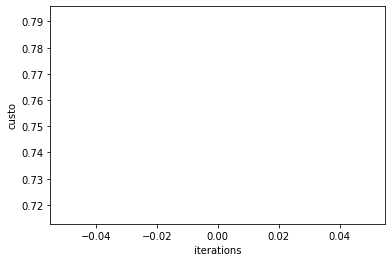

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), cost, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('custo')

### Regressão Logistica


####Sigmoide 
$$ y' = \frac{1}{1+e^{w^TX}} $$


####Funão de erro (Binary Cross Entropy):

$$ -y \log{(y')}-(1-y) \log{(1-y')} $$


####Custo Médio:
$$ \frac{1}{m} \sum_{i=1}^{m} BCE $$
\
$$ \frac{1}{m} \sum_{i=1}^{m} -y \log{(y')}-(1-y) \log{(1-y')} $$


#### Otimização com Gradiente:

para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m ( \frac{1}{1+e^{w^TX}} - y_i) X_j^i$$
}




In [ ]:
def sigmoide(z):
  return 1/(1+np.exp(-z))

def extendX(x):
  m = x.shape[0]                      #número de linhas
  return np.concatenate((np.ones([m, 1]), x), axis=1)

def binaryCrossEntropy(w, x, y):
  y_ = sigmoide(x@w.T)
  return (-y*np.log(y_))-((1-y)*np.log(1-y_))

def meanCost(w, x, y):
  m = y.shape
  return sum(binaryCrossEntropy(w, x, y))/m

def logisticGradientDesc(w, x, y, lr, epochs):
  m = x.shape[1]
  y_ = np.zeros(1)
  #print(m)
  cost = []
  for i in range(epochs):
    y_ = sigmoide(x@w.T)
    #print("y: ", y.shape,"y_: ", y_.shape, "x: ",x.shape, "w: ", w.shape)
    w = w - (lr/m) * sum((x.T*(y_ - y)).T)
    cost.append(meanCost(w, x, y))

  return w, cost

def arcuracy(y_, y):
  vp = 0
  vn = 0
  fp = 0
  fn = 0

  for i in range(len(y)):
    if(y_[i] == y[i] and y_[i] == 1):
      vp+=1
    elif(y_[i] == y[i] and y_[i] == 0):
      vn+=1
    elif(y_[i] != y[i] and y_[i] == 1):
      fp+=1
    elif(y_[i] != y[i] and y_[i] == 0):
      fn+=1
  print("arcuracy: ", (vp+vn)/(vp+vn+fp+fn))

def train(w, x, y, lr, epochs):
  print("Train")
  w, cost = logisticGradientDesc(w, x, y, lr, epochs)
  return w, cost

def test(w, x, y):
  print("Test")
  #print(x[0,:])
  bce = (sigmoide(x@w.T))
  #print(bce)
  result = []
  for i in bce:
    #print(i)
    if i >= 0.5:
      result.append(1)
    else:
      result.append(0)
  #print(np.asarray(result))
  #print(y)
  arcuracy(result, y)
      

def logisticRegression(w, x_train, y_train, x_test, y_test, lr, epochs):
  print("Learning Rate: ", lr)
  print("Epochs: ", epochs)
  print("X_Train: ", x_train.shape)
  print("Y_Train: ", y_train.shape)
  print("X_Test: ", x_test.shape)
  print("Y_test: ", y_test.shape)

  w, cost = train(w, x_train, y_train, lr, epochs)
  test(w, x_test, y_test)
  
  #print(w)

In [ ]:

# primeiro vamos dividir nossa base de dados entre features e target
X= cancer.iloc[:,0:-1]# Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y=cancer.iloc[:,-1] # Selecionando todas as linhas da última coluna ['Class'].

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

epochs = 100
x = np.asarray(x_train)
x = (x - x.mean()) / x.std() ##normalization
y_train = np.asarray(y_train)      ##convert in to numpy array
x_train = extendX(x)               ##extend with ones

x = np.asarray(x_test)
x = (x - x.mean()) / x.std() ##normalization
y_test = np.asarray(y_test)      ##convert in to numpy array
x_test = extendX(x)               ##extend with ones

lr = 0.01
#w = np.random.rand(1, x.shape[1]+1)
w = np.ones(x_train.shape[1])/10
#print(x)
#print(y)
#print(sigmoide(x@w.T))

#w, cost = logisticGradientDesc(w, x, y, lr, epochs)
#print(w.shape)
logisticRegression(w, x_train, y_train, x_test, y_test, lr, epochs)

Learning Rate:  0.01
Epochs:  100
X_Train:  (398, 31)
Y_Train:  (398,)
X_Test:  (171, 31)
Y_test:  (171,)
Train
Test
arcuracy:  0.9415204678362573
